# <p><span style="color: rgb(41, 105, 176);"><strong><u>KMeans Cluster:</u></strong></span></p>

###  <p><span style="color: rgb(84, 172, 210);">1. Import Libraries</span></p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

###  <p><span style="color: rgb(84, 172, 210);">2. Import data and reshape it</span></p>

In [2]:
data = np.genfromtxt('data.csv', delimiter=',')

In [3]:
data = data.reshape(-1,3) # 3 dimensions are easy to vizualize.

In [4]:
x = data[:,0]
y= data[:,1]
z= data[:,2]

###  <p><span style="color: rgb(84, 172, 210);">3. Ploting data points </span></p> 
Plot the data point to see how they are scattered in x-y-z plane.

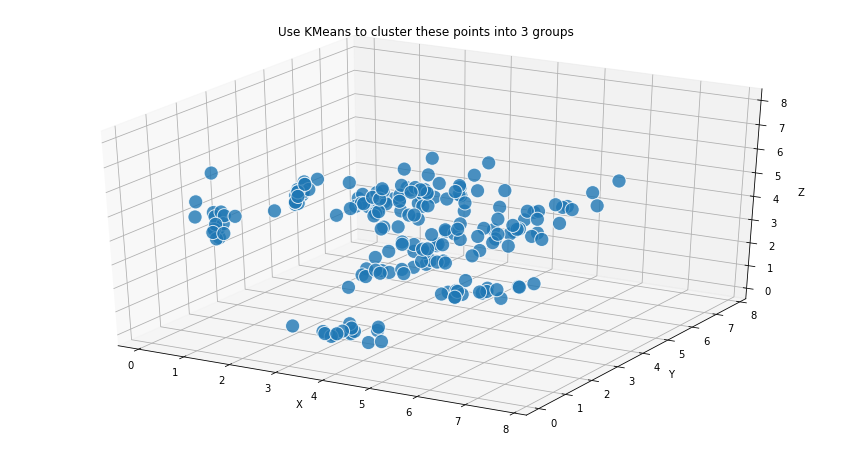

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z,
           linewidths=1, alpha=.8,s = 200, edgecolor='white')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Use KMeans to cluster these points into 3 groups")
plt.show()

###  <p><span style="color: rgb(84, 172, 210);">4. KMeans clustering </span></p>  

#### <p><span style="color: rgb(26, 188, 156);">4.1 Create Kmeans model:</span></p>
Cluster datapionts into 3 groups

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_

####  <p><span style="color: rgb(26, 188, 156);">4.2 Vizualization of Cluster</span></p> 
The plot shows how the scattered data points have been clustered into 3 groups.

Text(0.5, 0.92, 'Cluster size 3')

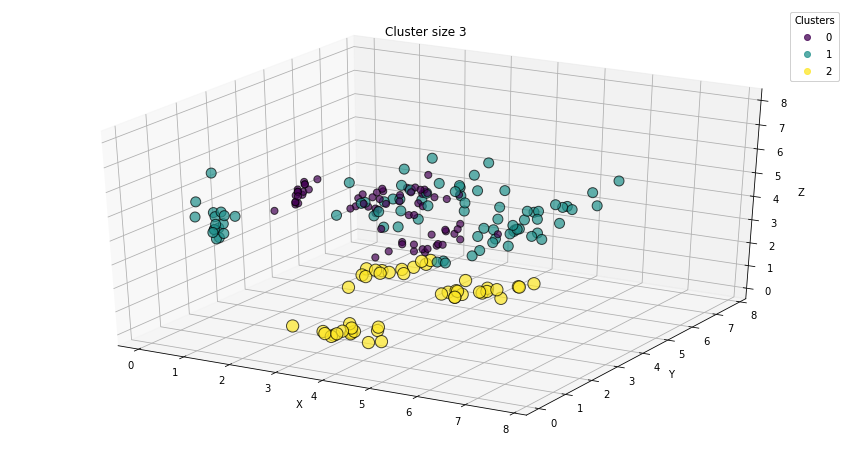

In [8]:

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

#plotting data points
scatter= ax.scatter(x, y, z,
                    linewidths=1, alpha=.7, edgecolor='k', s =(labels+1)*50,c=labels)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Cluster size 3")


# #plotting centers, Red triangles are the centers
# center = centers.tolist()
# for i in range(len(center)):
#     x1, y1, z1 = [*center[i]]
#     ax.scatter(x1, y1, z1, c='red', s=200, marker='^')
#     ax.text(x1, y1, z1-0.8, s="C "+str(i+1), fontsize=14)


    

###  <p><span style="color: rgb(84, 172, 210);">5. Prediction </span></p>  


In [9]:
# new data points to predict the groups.

test= np.array([
  [5.1, 3.2, 1.7],
  [6.9, 3.2, 5.3],
  [7,3,2],
  [4.5, 3.2,6]])

In [10]:
print(kmeans.predict(test))

[2 1 2 1]


Given four new data-points , Kmeans model has predicted the groups to which these points belong.

#### <p><span style="color: rgb(26, 188, 156);">5.1 Plot new data points</span></p> 
Plot new data-points to see where they fall in scattered data.

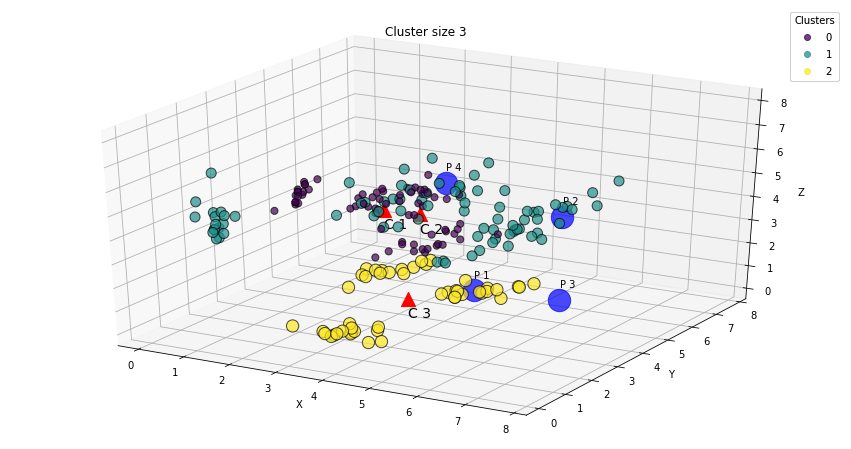

In [11]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z,
                     linewidths=1,
                     alpha=.7,
                     edgecolor='k',
                     s = (labels+1)*50,
                     c=labels)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Cluster size 3")

#plotting centers, Red triangles are the centers
center = centers.tolist()
for i in range(len(center)):
    x1, y1, z1 = [*center[i]]
    ax.scatter(x1, y1, z1, c='red', s=200, marker='^')
    ax.text(x1, y1, z1-0.8, s="C "+str(i+1), fontsize=14)

#plotting test data points
points = test.tolist()
for item in range(len(points)):
    x1 , y1, z1 = [*points[item]]
    ax.scatter(x1, y1, z1, c='blue',s=500, alpha=.7)
    ax.text(x1, y1, z1+0.5, s="P "+str(item+1))
plt.show()

<p># <em><span style="color: rgb(209, 72, 65);">Red Triangle Marks</span></em> are the <strong><em>centroids </em></strong>of the clusteres</p>
<p># <span style="color: rgb(41, 105, 176);">Blue circle</span> are the new data-points.</p>